In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow 

import warnings
warnings.filterwarnings(action='once')

from sklearn.mixture import GMM
from scipy import misc
import numpy as np
import random
'''
from sklearn.mixture import GaussianMixture



from sklearn.cluster import KMeans
'''

from gmm_image import gmm_image



In [3]:
rgb_image_arr = misc.imread('nacho_pic.jpg') 

(2322L, 4128L, 3L)


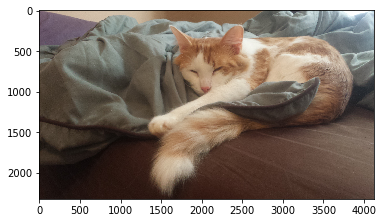

In [4]:
imshow(rgb_image_arr)
print rgb_image_arr.shape

In [5]:
all_red_pixel_values = rgb_image_arr[:,:,0].flatten()
all_green_pixel_values = rgb_image_arr[:,:,1].flatten()
all_blue_pixel_values = rgb_image_arr[:,:,2].flatten()

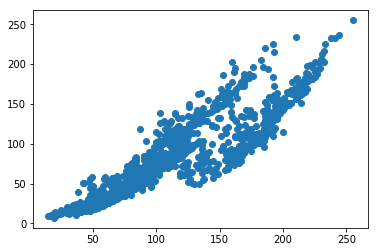

In [6]:
random_values = random.sample(range(0, 9585216), 1000)

plt.scatter(all_red_pixel_values[random_values],
            all_blue_pixel_values[random_values])

In [7]:
rgb_pixel_values = np.array([all_red_pixel_values[random_values],
                             all_green_pixel_values[random_values],
                             all_blue_pixel_values[random_values]]).reshape(1000,3)

In [8]:
gmm = GMM(n_components=15,covariance_type="full").fit(rgb_pixel_values)
gmm_labels = gmm.predict(rgb_pixel_values)

C:\Users\Mark\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Mark\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Mark\Anaconda2\lib\site-packages\sklearn\utils\deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


NameError: global name 'np' is not defined

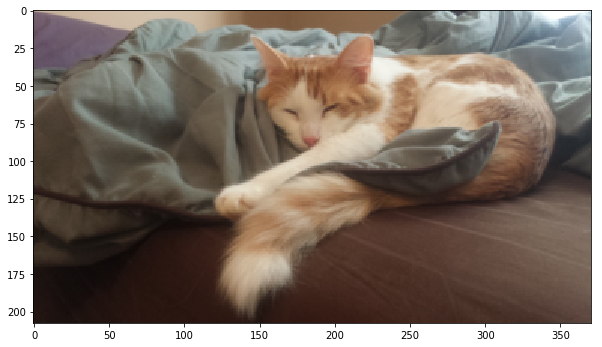

In [10]:
rgb_image_arr_downsampled = misc.imresize(rgb_image_arr,0.09)

plt.figure(figsize=(10,10))
imshow(rgb_image_arr_downsampled)


gmm_image_prediction = np.empty_like(rgb_image_arr_downsampled)

for x in range(rgb_image_arr_downsampled.shape[0]):
    for y in range(rgb_image_arr_downsampled.shape[1]):
        gmm_image_prediction[x,y] = gmm_image.predict_pixel_GMM_color_MSE(rgb_image_arr_downsampled[x,y],gmm)
        
plt.figure(figsize=(10,10))
imshow(gmm_image_prediction)